# Run MLP on generated Black Scholes data

In [2]:
# Load input data

import numpy as np

X = np.load('input_data.npy')
y = np.load('output_data.npy')

In [3]:
# Split into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [4]:
# Scale input data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=2, train_sizes=np.linspace(.2, 1.0, 6)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [6]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(solver='adam', alpha=1e-6, hidden_layer_sizes=(200,200,200), 
                     learning_rate='adaptive', tol=1e-8, max_iter=2, random_state=1, verbose=True)

In [7]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.00000826
Iteration 2, loss = 0.00000124


/home/bmueller42/miniconda2/envs/bsenv/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200, 200), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=2, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=1e-08, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [8]:
model.score(X_test, y_test)

MemoryError: 

In [10]:
model.score(X_train, y_train)

0.99995936424196297

In [59]:
# Predict example

K = 12.2
S = 12.0
ratio_K_S = K/S
time = 38.0
rate = 0.01
sigma = 1.0
dividend = 0.03
X_pred = np.array([ratio_K_S, time, rate, sigma, dividend]).reshape(1, -1)
X_pred_scaled = scaler.transform(X_pred)

# Run prediction
y_pred = model.predict(X_pred_scaled)
print y_pred * S

[ 1.44293023]


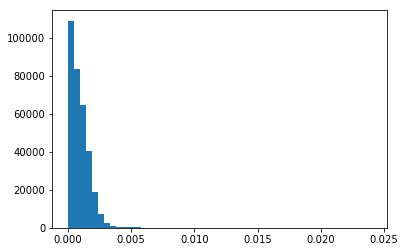

In [50]:
# Plot test error distribution

y_pred = model.predict(X_test)
error = abs(y_test - y_pred)
plt.hist(error, 50)
plt.show()

In [1]:
# Maximum test set error

np.max(error)

NameError: name 'np' is not defined

In [53]:
# Percentage of samples with less than 1% deviation from true value

less_than_1bip = float(len(np.where(error < 0.01)[0]))
num_samples = float(len(error))

print "samples {}\nless than 0.01 {}\npercentage {}".format(num_samples, less_than_1bip, less_than_1pct/num_samples)

samples 330000.0
less than 1 pct 329882.0
percentage 0.999642424242
